<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

Antes de entrarmos nos testes de hipóteses vamos recordar o que são as distribuições de probabilidade e os principais gráficos envolvidos. Se você está confortável com esses conceitos pode saltar e ir diretamente para os testes de hipóteses. Ao final é importante que você saiba construir e interpretar gráficos de distribuição de probabilidade e distribuição acumulada.

#Variáveis aleatórias
Em qualquer tipo de estudo, há sempre a necessidade de se focar em um ou mais
atributos (características) dos indivíduos (objetos) que compõem esta população. Estes atributos constituem **as variáveis de estudo**. Nesta aula estaremos interessados em estudar variáveis quantitativas, isto é, aquelas que são resultados de mensurações ou contagens, em termos práticos, são aquelas variáveis com as quais faz sentido  fazer operações algébricas como: somas, média, mediana, desvio padrão, etc. Alguns exemplos de variáveis aleatórias seriam: renda dos brasileiros, temperatura máxima diária, peso de peças industriais, número de likes ou comentários, tempo de transferência de um arquivo. 

## Variáveis aleatórias discretas e suas funções de probabilidade

Uma quantidade 𝑋 é denominada de variável aleatória discreta se assume valores num conjunto finito ou infinito numerável com certa probabilidade.

Exemplo 1. X: número mensal de fraudes em cartões de crédito $X ∈ \left \{0, 1,...\right \}$

Exemplo 2. X: número de peças defeituosas quando analisadas n peças  $X ∈ \left \{0, 1,..., n\right \}$

Exemplo 3. X: número diário de bugs registrados em um aplicativo $X ∈ \left \{0, 1,...\right \}$
$

Exemplo 4. X: número de curtidas diárias feitas em *posts* de uma rede social $X ∈ \left \{0, 1,...\right \}$


### Função massa de probabilidade (em inglês, Probability mass function)

Dizemos que $P(X)$, função massa de probabilidade, é uma função que atribui a cada valor $x_i$ da variável aleatória discreta $X$ sua probabilidade de ocorrência
$$ P(X = x_i) = p(x_i) $$

com as seguintes propriedades:

1. $$ p(x_i) \ge 0 \text{ , para } \forall i$$

2. $$ \sum_i p(x_i) = 1$$

como consequência temos $0 \le p(x_i) \le 1$ para $\forall i$.

**Função Acumulada de Probabilidade** 

É definida, para qualquer número real $x$ pela expressão
$$F(t)= P(X ≤ t) = \sum P(X=x_i), \forall x_i \le t$$
isto é, $F(t)$ representa a soma das probabilidade de todos os valores de X que são menores ou iguais a $t$.


Na literatura existem diversas distribuições de probabilidade que permitem modelar v.a discretas, destacam-se as distribuições: 

*   Bernoulli
*   Binomial
*   Hipergeométrica
*   Poisson

A distribuição de Poisson, por exemplo, é amplamente implementada quando se deseja modelar variáveis aleatórias discretas que estão associadas ao número de eventos que ocorrem num intervalo de tempo, ou superfície ou volume. Exemplo: Número de mensagens eletrônicas recebidas por um provedor em horário comercial

Neste link podem ver as distribuições de probabilidade consideradas na biblioteca `scipy` de python [Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=scipy%20stats#module-scipy.stats)


### Exemplo

Considere X a v.a discreta que representa o número de fraudes de cartões de crédito reportados num banco a cada hora. Sabe-se, por análises anteriores, que o número médio de fraudes reportados, por hora, é de 2.5. Supondo que a **distribuição de Poisson** seja adequada nessa situação apresente um gráfico com a função de probabilidade.

 Se X segue uma distribuição de Poisson. Então, sua função de probabilidade é dada por:

 $$P(X=x)= \dfrac{e^{-μ}μ^x}{x!}, x=0,1,2,...$$

 em que μ representa a média de X, no contexto dos dados, o número médio de fraudes registrados por hora.
 
Para mais detalhes ver, por exemplo, o livro: Estatística Básica de Morettin e Bussab.

In [12]:
# Cálculo de probabilidades

from scipy.stats import poisson
#Vamos calcular P(X=0), ou seja, a probabilidade de que em certa hora haja zero fraudes

x=0
mu= 2.5

poisson.pmf(0,mu)

0.0820849986238988

Soma de todas as probabilidades (até 14): 0.9999999308468615


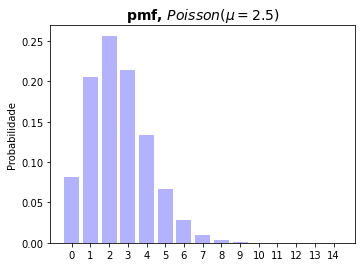

In [13]:
#Função massa de probabilidade

from scipy.stats import poisson

xi=np.arange(0,15)
mu= 2.5

prob = poisson.pmf(xi, mu)
print("Soma de todas as probabilidades (até 14):",sum(prob))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(xi,prob,color='blue',linewidth=1.5, alpha=0.3) 
plt.ylabel('Probabilidade')
plt.title('pmf, $Poisson(\mu=2.5)$', fontsize=14, weight='bold') 
plt.xticks(xi)
plt.show()

Note que há uma alta probabilidade de ter entre 1 e 3 fraudes (inclusive) por hora. Calcule essa probabilidade.

In [14]:
# Código P(1<=X<=3)


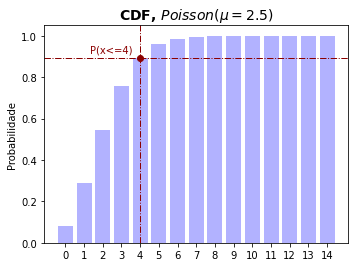

In [15]:
#Função Acumulada de Probabilidade

from scipy.stats import poisson

xi=np.arange(0,15)
mu= 2.5

prob = poisson.cdf(xi, mu)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(xi,prob,color='blue',linewidth=1.5, alpha=0.3) 
plt.ylabel('Probabilidade')
plt.title('CDF, $Poisson(\mu=2.5)$', fontsize=14, weight='bold') 
plt.xticks(xi)


plt.axvline(4,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(poisson.cdf(4, mu), linewidth=1,linestyle='-.',color='darkred')   
plt.plot(4, poisson.cdf(4,mu),'o',color='darkred')  
plt.text(1.3, 0.92, f'P(x<=4)', fontsize=10,color='darkred')

plt.show()

Note que a partir da função acumulada de probabilidade é possível calcular, por exemplo, a probabilidade de ter no máximo 4 fraudes numa hora.

In [16]:
from IPython.display import display, Math, Latex 
p = poisson.cdf(4, 2.5)

Math('P(X \le 4) = ' +  f'{p :.3f}')  

<IPython.core.display.Math object>

**Exercício:** Qual é a probabilidade de registrar mais de 3 fraudes num hora?

In [17]:
# código

## Variáveis aleatórias contínuas e suas distribuições de probabilidade

Uma quantidade 𝑋 é denominada de variável aleatória contínua se assume valores num intervalo intervalo de números reais com certa probabilidade.

Exemplo 1. X:  Tempo necessário para efetivar uma transação $X ∈ (0, \infty) $

Exemplo 2. X: Temperatura máxima, em graus Celsius, $X ∈ (-\infty, \infty) $

Exemplo 3. X: Custo do sinistro de um carro $X ∈ (0, \infty) $

Exemplo 4. X: Salários dos brasileiros $X ∈ (a, \infty) $,  $a>0$

Exemplo 5. X: Saldo em aplicações financeiras $X ∈ (0, \infty) $ ou $X ∈ (-\infty, \infty) $

### Função de distribuição de probabilidade

Uma v.a. X contínua é caracterizada por sua função densidade de probabilidade 𝑓(𝑥), com as propriedades:

1. $$ f(x) \ge 0 \text{, para todo x} $$ 

2. $$ \int_{-\infty}^{+\infty} f(x) dx = 1$$

A probabilidade para v.a. contínuas é definida como a área sob a curva de densidade $f(x)$ no intervalo desejado. 

$$P(X \in (a,b))= \int_{a}^{b} f(x) dx$$.

Obs. A probabilidade de "um ponto" é zero, isto é,  $P(X=x_0)=0.$


**Função de distribuição acumulada** (em inglês,  cumulative distribution function)

$$F(t)= P(X \le t) = \int_{-\infty}^{t} f(x) dx$$

Na literatura existem diferentes distribuições de probabilidade, $f(x)$, que permitem modelar v.a contínuas, destacam-se as distribuições: 

*   Normal
*   T-student
*   Exponencial
*   Qui-quadrado

A distribuição Normal, por exemplo, é amplamente implementada quando se deseja modelar variáveis aleatórias contínuas que são simétricas em torno da média cujas probabilidades de ocorrencias diminuem quando os valores aumentam ou diminuem. Exemplo: Altura dos individuos de um certo pais. Note que podemos assumir que a maioria das pessoas apresentam alturas em torno da média, por exemplo, 170 cm e que a probabilidade de encontrar pessoas cada vez mais altas ou baixas tende a zero. Além disso, é possível assumir simetria em torno da média, isto é, podemos dizer que 50% dos indívíduos apresentam alturas maiores a 170 cm. Vocês devem lembrar que curva da função de densidade da dist. normal é em forma de sino.

Neste link podem ver as distribuições de densidade consideradas na biblioteca `scipy` de python [Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=scipy%20stats#module-scipy.stats)

### Exemplo

Assuma que o gasto mensal em cartão de crédito dos correntistas de um certo banco é uma variável aleatória que segue uma distribuição normal com média de 3.000 reais e desvio padrão de 500 reais. Apresente a distribuição de densidade.

In [18]:
# Cálculo de probabilidades
from scipy.stats import norm

#Vamos calcular P(X<2000)

x=0
mu= 3000
sigma=500

norm.cdf(2000,loc=mu,scale=sigma)

0.022750131948179195

podemos interpretar essa probabilidade como 2,275% dos correntistas desse banco têm gastos mensais em cartão de crédito menor que 2.000 reais.

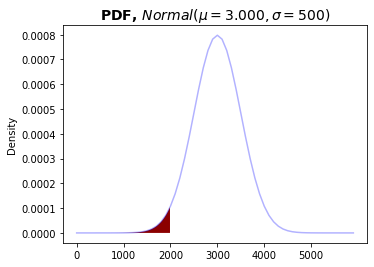

In [19]:
#Função de densidade

from scipy.stats import norm

xi=np.arange(0,6000,100)
mu= 3000
sigma=500

fx = norm.pdf(xi, mu, sigma)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(xi,fx,color='blue',linewidth=1.5, alpha=0.3) 
plt.fill_between(np.arange(0,2000,10), norm.pdf(np.arange(0,2000,10), mu, sigma), facecolor='darkred')     
plt.ylabel('Density')
plt.title('PDF, $Normal(\mu=3.000, \sigma= 500)$', fontsize=14, weight='bold') 
plt.xticks(np.arange(0,6000,1000))
plt.show()

A área vermelha no gráfico acima representa a probabilidade: $P(X<2000)$. Note, por exemplo, que há uma pequena probabilidade de que correntistas desse banco tenham gastos mensais, em cartão de crédito, superior a 5mil reais.

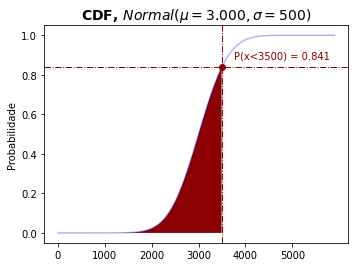

In [20]:
#Função acumulada de probabilidade

from scipy.stats import norm

xi=np.arange(0,6000,100)
mu= 3000
sigma=500

prob = norm.cdf(xi, mu, sigma)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(xi,prob,color='blue',linewidth=1.5, alpha=0.3) 
plt.fill_between(np.arange(0,3500,10), norm.cdf(np.arange(0,3500,10), mu, sigma), facecolor='darkred')     
plt.ylabel('Probabilidade')
plt.title('CDF, $Normal(\mu=3.000, \sigma= 500)$', fontsize=14, weight='bold') 
plt.xticks(np.arange(0,6000,1000))

plt.axvline(3500,linewidth=1,linestyle='-.',color='darkred') 
plt.axhline(norm.cdf(3500,mu, sigma), linewidth=1,linestyle='-.',color='darkred')   
plt.plot(3500,norm.cdf(3500,mu, sigma),'o',color='darkred')  
plt.text(3750, 0.88, f'P(x<3500) = { norm.cdf(3500,mu, sigma) :.3f}', fontsize=10,color='darkred') 


plt.show()

A área vermelha acima representa a probabilidade: $P(X<3500)$.

In [21]:
from IPython.display import display, Math, Latex 
p = norm.cdf(3500, mu, sigma)

Math('P(X \le 3500) = ' +  f'{p :.3f}')  

<IPython.core.display.Math object>

**Exercício.** Calcule a probabilidade de que o gasto mensal de um certo correntista desse banco 

a) esteja entre 2.000 e 3.000 reais 

b) seja maior que 4.200 reais?

In [22]:
# Código

# Testes de Hipóteses 

Os Testes de Hipóteses são procedimentos estatísticos que permitem tomar uma decisão embasada nas evidências encontradas em dados. No começo das análises devem ser estabelecidas duas hipóteses: hipótese nula ($H_0$) e hipótese alternativa ($H_1$) e, usando a teoria de probabilidade,  verifica-se se estatísticamente os dados fornecem evidências suficientes ou não para rejeitar a hipótese nula ($H_0$).

Aqui nossa abordagem será bastante prática. A apresentação de Testes de Hipóteses será, portanto, bastante *informal* supondo que você já tem algum conhecimento sobre Testes de Hipóteses. 

**Exemplo.** Uma aplicação comum dos testes de hipóteses, que você já deve ter ouvido, consiste em verificar se um medicamento (ou vacina) é eficaz.

> $H_0$: O medicamento (ou vacina) não é eficaz

> $H_a$: O medicamento (ou vacina) é eficaz

Um procedimento usualmente adotado consiste em selecionar indíviduos, com características semelhantes, e distribui-los em dois grupos: A: recebem o tratamento e B: recebem um placebo (sem saber que não está tomando o medicamento). Definem-se as hipóteses em termos de, por exemplo, número médio de dias necessários para haver melhora. As hipóteses podem ser reescritas como:

> $H_0:μ_A=μ_B$, o tempo médio de haver melhora nos dois grupos é igual

> $H_a:μ_A \ne μ_B$, o tempo médio de haver melhora nos dois grupos é diferente

Em seguida, calcula-se, por exemplo, o número médio (amostral) de dias, em cada grupo, que foram necessários para haver melhora, isto é, $\bar{x}_A$ e $\bar{x}_B$ e por meio de procedimentos probabilísticos determina-se se os valores observados na amostra dão ou não suporte as hipóteses estabelecidas.


Existem inúmeros tipos de teste de hipóteses para solução de diferentes problemas. 

1. **Testes de normalidade** *verifica se um conjunto de dados apresenta uma  ditribuição próxima do normal* 
2. **Testes de correlação** *verifica a dependência linear entre dois conjuntos de dados* 
3. **Testes estacionários** *verifica se uma série temporal é uma série estacionária ou não*
4. **Testes paramétricos** testes em que as distribuições dos dados são conhecidas, usam-se por exemplo: z-test, t-test, chi2-test etc.* 
5. **Testes não paramétricos** *testes em que as distribuições dos dados não são conhecidas* 

Nesta aula estudaremos testes paramétricos para a média de uma população (one sample) ou duas populações (two sample). Para outros testes estatísticos em Python você pode consultar o guia de referência rápida Guide to Statistical Hypothesis Tests in Python.
(https://www.kaggle.com/shashwatwork/guide-to-statistical-hypothesis-tests-in-python#).



## Procedimento para testar hipóteses
A seguir apresentam-se os passos que devem ser adotados para tomar uma decisão usando o valor-p.

Passos:

1.   Formular as hipóteses: 
*   Hipótese Nula ($𝐻_0$): afirmação sobre o(s) parâmetro(s) de interesse contra a qual estaremos buscando evidência nos dados amostrais.

*   Hipótese Alternativa ($𝐻_1$): afirmação sobre o(s) parâmetro(s) de interesse que suspeitamos (ou esperamos) seja verdadeira.

2.   Procurar evidência nos dados (amostras)
\
Calcula-se, por exemplo, a média e desvio padrão amostral.

3.   Calcula-se o valor-p
\
Esta probabilidade mede a força da evidência contida nos dados contra a hipótese nula $𝐻_0$

4.  Toma-se uma decisão usando o valor-p e nível descritivo (α) 
\
Se valor-p < $α$, diz-se que a amostra forneceu evidência suficiente para rejeitar a hipótese nula. Caso contrário, se valor-p > $α$ , dizemos que a evidência amostral não é forte o suficiente para rejeitar a hipótese nula.


Observação. Vale relembrar que $α$ representa a probabilidade de se cometer o Erro Tipo 1, isto é, rejeitar $H_0$ quando $H_0$ é verdadeira. Na prática, costuma-se usar $\alpha= 0,05$. Nesta aula estaremos principalmente interessados em teste **médias** (nosso parâmetro de interesse).


O desafio consiste em como calcular esse valor-p (é uma probabilidade), qual distribuição de probabilidade deve ser usada? Na verdade, o cálculo dessa probabilidade depende do(s) parâmetro(s) que você quer testar. Lembre-se que parâmetro é um quantidade desconhecida de uma característica da população e sobre a qual temos interesse, por exemplo, renda **média** dos cidadãos da América do sul.

## Teste de hipóteses para a média, μ, de uma população
Nestes testes, o principal interesse consiste em verificar uma conjetura da média de uma certa população. 

Seja X a variável aleatória de interesse, vamos assumir que X segue uma certa distribuição de probabilidade com média $\mu$ e desvio padrão $\sigma$. Claramente $\mu$, média populacional, é um valor desconhecido, nós queremos verificar, por meio de dados, se temos ou não evidências suficientes que dêem suporte a uma afirmação feita dessa média populacional ($\mu$), por exemplo, se $\mu$ é diferente de 2 ou não.
\
Para testar uma hipótese para $\mu$, devemos selecionar uma amostra aleatória de tamanho $n$ da população de interesse e calcular a média $(\bar{x})$ e o desvio padrão ($s$) amostral.

Para construir testes de hipóteses temos as seguintes opções:

1. **Variância** populacional $(\sigma^2)$ **conhecida** (difícil de encontrar na prática)
\
Usamos a estatística Z para calcular o valor-p.
$$Z= \dfrac{\bar{x}-\mu}{\sigma/\sqrt{n}}$$

*   **n grande**: Z aproxima-se de uma distribuição Normal padrão, isto é, com média 0 e variância 1.
*   **n  pequeno**. Se X, a variável aleatória de interesse, segue uma distribuição Normal, então Z segue uma distribuição Normal com média 0 e variância 1. Se não é possível assumir que X segue uma dist. Normal recomenda-se usar testes não paramêtricos (abordagem que não consideraremos aqui).

2. **Variância** populacional $(\sigma^2)$ **desconhecida**  (comum na prática)
\
Usamos a estatística T para calcular o valor-p.
$$T= \dfrac{\bar{x}-\mu}{s/\sqrt{n}}$$


*   **n grande**. Se X, a variável aleatória de interesse, segue uma distribuição Normal, então T segue uma distribuição t-student com n-1 graus de liberdade. Se não é possível assumir que X segue uma dist. Normal, não importa, como n é grande T se aproxima de uma distribuição Normal com média 0 e variância 1.
*   **n pequeno.** Se X, a variável aleatória de interesse, segue uma distribuição Normal, então T segue uma distribuição t-student com n-1 graus de liberdade. Se não é possível assumir que X segue uma dist. Normal recomenda-se usar testes não paramêtricos (abordagem que não consideraremos).


Obs. Definir em estatística o que é uma amostra grande é difícil. No entanto, na literatura a maioria dos pesquisadores consideram um amostra "grande" se $n>30$.

### Exemplo (Glassdoor Salaries)

No último ano houve uma série de mudanças na companhia Glassdoor. O diretor deseja verificar se o salário médio da empresa se mantêm ou não quando comparado com o ano passado que foi de 95.900.

In [23]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
%matplotlib inline

data = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [24]:
# Análise descritiva

print('Salário médio atual: ', data.income.mean())
print('Desvio padrão do salário atual: ', data.income.std())

Salário médio atual:  94472.653
Desvio padrão do salário atual:  25337.493272103773


É interessante fazer um histograma para visualizar a distribuição da varíavel aleatória de interesse, em nosso exemplo, os salários.

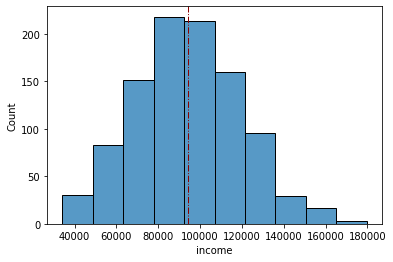

In [25]:
# Histograma

sns.histplot(data.income, bins=10)
plt.axvline(data.income.mean(),linewidth=1,linestyle='-.',color='darkred') 
plt.show()

Note-se que podemos assumir que a v.a. salários segue, aproximadamente, uma distribuição normal. Pelo contexto do problema temos as hipóteses de interesse são:

$$H_0: \mu = 95.900 $$
$$H_1: \mu \ne 95.900, $$

em que $\mu$ é o salário médio atual dos empregados da companhia em questão.

Note-se que o desvio padrão $\sigma$ da população (salários de todos os empregados da companhia) não é conhecido e que podemos assumir, pelo histograma acima, que os salários seguem, aproximadamente, uma distribuição Normal. Assim,  podemos usar a dist. t-student para testar essa hipótese ou, também, podemos usar a distribuição Normal uma vez que n é grande (1000). Vocês vão perceber que os resultados são quase idénticos.

In [26]:
# Usando a distribuição t-student

from scipy import stats

mu0=95900
alpha=0.05

ttest_Score, p_value = stats.ttest_1samp(data.income, popmean=mu0) #alternative='two-sided'
print("t:", ttest_Score)
print("Valor-p:", round(p_value,5))

if(p_value <  alpha):
  print("Rejeita-se H0 ao n.s. de 5%.")
else:
  print("Não se rejeita-se H0 ao n.s. de 5%.")

t: -1.781418344322885
Valor-p: 0.07515
Não se rejeita-se H0 ao n.s. de 5%.


Não se rejeita-se H0 ao n.s. de 5%, isto é, não há evidências suficientes para dizer que o salário médio deste ano é diferente de 95.900.

In [27]:
# Aproximação pela distribuição Normal

from statsmodels.stats.weightstats import ztest

mu0=95900
alpha=0.05

ztest_Score, p_value= ztest(data.income ,value = mu0, alternative='two-sided')
print("z:", ztest_Score)
print("Valor-p:", round(p_value,5))

if(p_value <  alpha):
  print("Rejeita-se H0 ao n.s. de 5%.")
else:
  print("Não se rejeita-se H0 ao n.s. de 5%.")

z: -1.781418344322885
Valor-p: 0.07484
Não se rejeita-se H0 ao n.s. de 5%.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Obs.** Fiquem atentos, a função  `stats.ttest_1samp` considera que a hipótese alternativa é sempre "diferente". Se sua hipótese alternativa for unilateral, ou seja, $\mu < a$ ou $\mu>a$, nesse caso, será necessário dividir o valor-p por 2.

**Visualizando o valor-p**

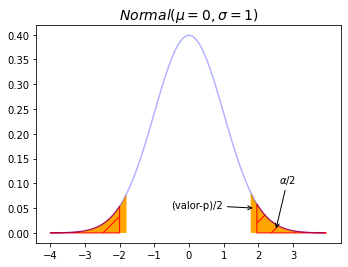

In [28]:
from scipy.stats import norm


mu= 0
sigma=1
z=1.7814

zi=np.arange(-4,4,0.1)
prob = norm.pdf(zi, mu, sigma)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(zi,prob,color='blue',linewidth=1.5, alpha=0.3) 
plt.fill_between(np.arange(-4,-z,0.1), norm.pdf(np.arange(-4,-z,0.1), mu, sigma), facecolor='orange', linewidth=15.0)     
plt.fill_between(np.arange(z,4,0.1), norm.pdf(np.arange(z,4,0.1), mu, sigma), facecolor='orange') 

plt.fill_between(np.arange(-4,norm.ppf(0.025,0,1),0.1), norm.pdf(np.arange(-4,norm.ppf(0.025,0,1),0.1), mu, sigma), hatch="/", edgecolor="r", facecolor="none")     
plt.fill_between(np.arange(norm.ppf(0.975,0,1),4,0.1), norm.pdf(np.arange(norm.ppf(0.975,0,1),4,0.1), mu, sigma), hatch="/", edgecolor="r", facecolor="none") 

#, facecolor='red',alpha=0.1
#plt.axvline(norm.ppf(0.025,0,1),linewidth=1,linestyle='-.',color='orange') 
#plt.axvline(norm.ppf(0.975,0,1),linewidth=1,linestyle='-.',color='orange') 

plt.title('$Normal (\mu=0, \sigma= 1)$', fontsize=14, weight='bold') 
plt.xticks(np.arange(-4,4,1))


plt.annotate(r'$\alpha/2$', 
             xy=(2.5, 0.005),                # ponto do gráfico
             xytext=(2.6, 0.1),           # posição do texto
             arrowprops=dict(arrowstyle="->")) 

plt.annotate("(valor-p)/2", 
             xy=(1.9, 0.05),                # ponto do gráfico
             xytext=(-0.5, 0.05),           # posição do texto
             arrowprops=dict(arrowstyle="->")) 


plt.show()

Note que a área (probabilidade) referente ao valor-p é maior que a área  (probabilidade) do nível de significância $\alpha$.

Valor-p= 0.07515 > 0.05 = $\alpha$, portanto não se rejeita $H_0$

### Intervalo de confiança


Para construir intervalos de confiança para $\mu$ será necessário considerar algumas suposições

Nesta aula vamos considerar somente o seguinte caso: **Variância, $\sigma$, conhecida (ou desconhecida) e n grande**

O intervalo de confiança com $(1-\alpha)$% de confiança para $\mu$ é dado da seguinte forma
$$\left ( \bar{x} \pm z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}} \right )$$ 
em que $z_{\alpha/2}$ é um percentil que deve ser procurado na distribuição normal padrão. Quando a variância, $\sigma$, é desconhecida podemos substituir $\sigma$ pelo desvio padrão amostral $s$, como o tamanho da amostra é grande podemos fazer essa substitução e seguir considerando a dist. normal.

Se variável aleatória de interesse segue uma distribuição normal e variância, $\sigma$, é desconhecida o intervalo de confiança para $\mu$ é dado da seguinte forma
$$\left ( \bar{x} \pm t_{\alpha/2; n-1} \dfrac{s}{\sqrt{n}} \right )$$ 
em que $t_{\alpha/2; n-1}$ é um percentil que deve ser procurado na distribuição t-student com $n-1$ graus de liberdade.

**Obs.** Na prática, quando n for "grande" podemos usar sempre a distribuição normal uma vez que teremos resultados numéricos muito parecidos, isto acontece porque a distribuição t-student converge para uma distribuição normal padrão quando n aumenta.


#### Exemplo
Usando a base de dados `Glassdoor Salaries` calcule um intervalo de confiança de 95% para o salário médio da companhia neste ano.

Verificamos nos exercícios anteriores que podemos assumir que os salários seguem uma distribuição normal e temos que a variância populacional é desconhecida. Assim, podemos usar a distribuição t-student para construir os intervalos de confiança.

In [29]:
# T-student! 

from scipy import stats

xbarra= data.income.mean()
s=data.income.std()
n= len(data.income)
stats.t.interval(0.95, df = n-1,loc = xbarra,scale= s/(pow(n,0.5)))                


(92900.34282005232, 96044.96317994769)

Note que com uma confiança de 95% o salário médio da companhia é um valor entre 92900.343 e 96044.963.

No código abaixo apresenta-se o intervalo de confiança usando a aproximação pela normal.

In [30]:
# Aproximação pela normal

from scipy import stats

xbarra= data.income.mean()
s=data.income.std()
n= len(data.income)

stats.norm.interval(0.95, loc=xbarra, scale=s/(pow(n,0.5)))

(92902.24775388998, 96043.05824611003)

Note que os dois intervalos apresentam valores bem parecidos.

In [31]:
# Contruindo o IC manualmente usando a dist. t
from scipy.stats import t

xbarra= data.income.mean()
s=data.income.std()
n= len(data.income)
t1=t.ppf(0.025,df=n-1)
t2=t.ppf(0.975,df=n-1)

print((xbarra-t2*s/(pow(n,0.5))), (xbarra+t2*s/(pow(n,0.5))))

92900.34282005232 96044.96317994769


### Histogramas e Gráficos de Densidade com o pacote seaborn



A biblioteca `Seaborn` oferece uma opção direta para estimativa da densidade de kernel. A função `distplot()` agrega todas essas funcionalidades para gráficos em *nível de figura*. Sendo um gráfico em nível de figura, não podemos usar essa função referenciando eixos ou empregar o `subplot()` da interface direta para criar múltiplos plots, sendo necessário empregar um esquema próprio do `Seaborn` de gráficos em *grid* (`facegrid`) que não trataremos aqui. Essas mesmas funções estão disponíveis separadamente e podemos igualmente empregá-las para gráficos simples ou múltiplos como empregamos até aqui:

```
histplot() = displot(... kind="hist")
kdeplot() = displot(... kind="kde")
ecdfplot() = displot(... kind="ecdf")
```

$\rightarrow$ *Cuidado: O `Seaborn` ainda possui a função `distplot()` (nome muito semelhante ao `displot()`!). Essa função está obsoleta e deve ser removida em futuras versões. Prefira, portanto, a função `displot()`, para uma função de nível de figura ou as funções individuais acima para gráficos no nível dos eixos.*  

Vamos ver aqui um conjunto de dados sobre vôos e tempos de atraso ou antecipação de chegadas. Por simplicidade vamos nos referir sempre à atrasos de chegadas (arr_delay) independente do valor ser positivo (atraso) ou negativo (antecipação).

In [32]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


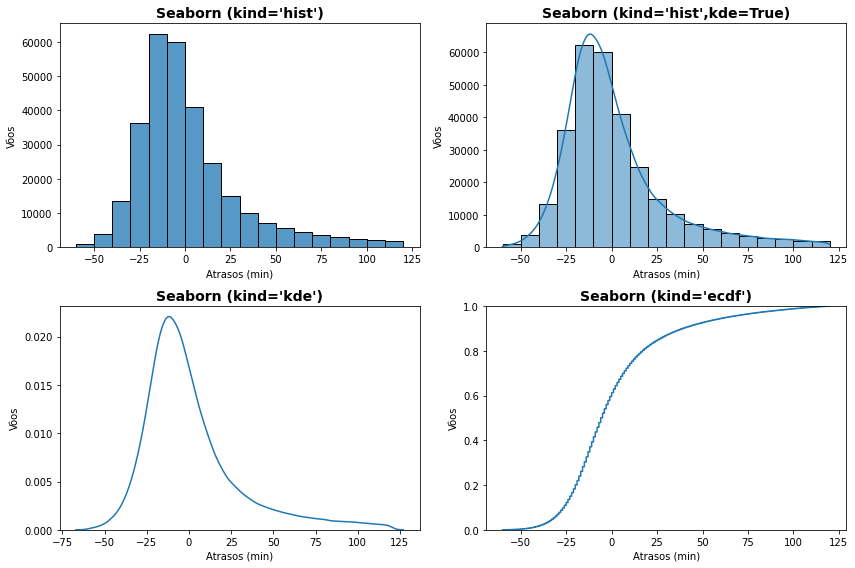

In [33]:
interval = flights['arr_delay'].max() - flights['arr_delay'].min()

plt.figure(figsize=(12,8))
binwidth=10

plt.subplot(2,2,1)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth))
plt.title('Seaborn (kind=\'hist\')', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(2,2,2)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth), kde=True)
plt.title('Seaborn (kind=\'hist\',kde=True)', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(2,2,3)
sns.kdeplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'kde\')', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(2,2,4)
sns.ecdfplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'ecdf\')', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

## Teste de hipóteses para comparar duas médias $μ_1$ e $μ_2$ de duas populações

Sejam $X_1$ e $X_2$ as duas variáveis aleatórias de interesse com médias $\mu_1$ e $\mu_2$, respectivamente, e variâncias $\sigma_1$ e $\sigma_2$ respectivamente.
\
As hipóteses de interesse são:

> $H_0:μ_A=μ_B$

> $H_a:μ_A \ne μ_B$ ou $H_a:μ_A < μ_B$ ou $H_a:μ_A > μ_B$


É necessário que as amostras aleatórias das duas populações sejam independentes.

*   **Para tamanhos de amostras grandes**
1.  Variâncias ($\sigma_1$ e $\sigma_2$) conhecidas é iguais (difícil de encontrar na prática)
\
Usaremos a distribuição Normal padrão para calcular o valor-p (valor aproximado). O valor-p será exato se as duas v.a. tiveram distribuições normais.
2. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas, porém iguais
\
Usaremos a distribuição t-student com $n_1+n_2-2$ graus de liberdade se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras serão grandes. 
3. Variâncias ($\sigma_1$ e $\sigma_2$) desconhecidas diferentes
\
Usaremos a distribuição t-student com $p$ graus de liberdade (calculados em função das variâncias amostrais) se as duas v.a. tiveram distribuições normais. Caso contrário, podemos usar a aproximação da distribuição normal uma vez que os tamanhos das amostras são grandes. 


### **Exemplo.** 
Agora estamos interessados em verificar se os salários médios dos homens e  as mulheres na companhia Glassdoor são diferentes.
\
Vamos verificar estatísticamente usando os dados da base Glassdoor


In [34]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
%matplotlib inline

data = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [35]:
# Estatística descritiva

incomeFemale = data[data.gender == 'Female'].income
incomeMale = data[data.gender == 'Male'].income

print('Média de Salários:')
print('Homens: {:.2f}'.format(incomeMale.mean()))
print('Mulheres: {:.2f}'.format(incomeFemale.mean()))
print('Diferença da média salarial é de {:.2f} ou {:.2f}%'.format(
        incomeMale.mean() - incomeFemale.mean(), 100*(incomeMale.mean() - incomeFemale.mean())/ incomeMale.mean()))
print("")
print('Desvio padrão de Salários:')
print('Homens: {:.2f}'.format(incomeMale.std()))
print('Mulheres: {:.2f}'.format(incomeFemale.std()))


Média de Salários:
Homens: 98457.55
Mulheres: 89942.82
Diferença da média salarial é de 8514.73 ou 8.65%

Desvio padrão de Salários:
Homens: 25517.52
Mulheres: 24378.28


Note que, aparentemente, os salários médio dos homens é maior quando comparado com o salário médio das mulheres. No entanto, observa-se um alta variabilidade nos salários destes dois grupo.  

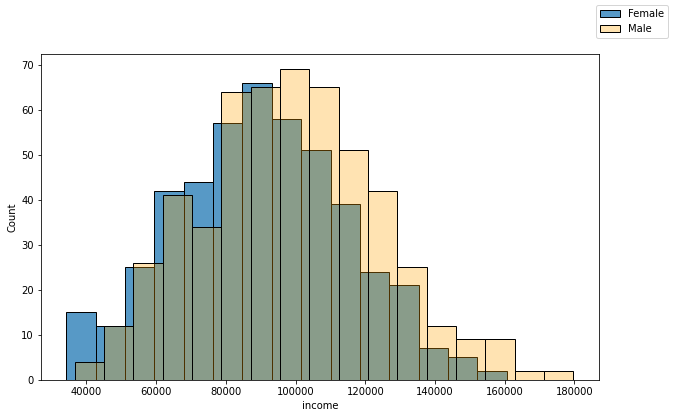

In [36]:
# Histogramas

fig = plt.figure(figsize=(10,6))
sns.histplot(incomeFemale)
sns.histplot(incomeMale,color='orange',alpha=0.3)
fig.legend(labels=['Female','Male'])
plt.show()

Nota-se que as distribuições dos salários das mulheres e homens seguem, aproximadamente, uma distribuição normal. Observa-se também que as variabilidades são "parecidas". Assim, podemos usar a distribuição t-student, assumindo igualdade de variâncias, para testar nossa hipótese

In [37]:
from scipy import stats  

ttest_Score, value_p = stats.ttest_ind(incomeFemale, incomeMale, equal_var=True)


print('p-value: {:.10f}'.format(value_p))

if value_p < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')

p-value: 0.0000000948
Rejeita-se a Hipótese Nula ao n.s. de 5%


Conclusão: Concluímos, portanto, que há diferença significativa entre a remuneração média dos homens e mulheres na empresa.

**Obs** É possível usar o teste de Bartletts's para verificar se duas populações apresentam a mesma variabilidade (igualdade de variâncias)

**Bartlett's test**

As hipóteses de interesse são:

> $H_0:\sigma^2_A=\sigma^2_B$

> $H_a:\sigma^2_A \ne \sigma^2_B$

In [38]:
#Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

from scipy.stats import bartlett
Bstat, value_p = bartlett(incomeFemale, incomeMale)

if value_p < 0.05:
	print('Rejeita-se a Hipótese Nula ao n.s. de 5%')
else:
	print('Não se rejeita a Hipótese Nula ao n.s. de 5%')

Não se rejeita a Hipótese Nula ao n.s. de 5%


No código abaixo apresenta-se o resultado do teste de hipótese usando-se a aproximação pela normal uma vez que os tamanhos das amostras são "grandes".


In [39]:
#Usando a aproximação pela normal

from statsmodels.stats.weightstats import ztest
zstat, value_p =ztest(x1=incomeFemale, x2=incomeMale, alternative="two-sided")
print('p-value: {:.10f}'.format(value_p))

p-value: 0.0000000761


**Teste para verificar normalidade**

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s

In [40]:
# Os salários das mulheres segue uma dist. normal?
from scipy.stats import normaltest
normaltest(incomeFemale)

NormaltestResult(statistic=3.345969375198365, pvalue=0.18768604460908875)

Note que podemos assumir que os salários das mulheres segue aproximadamente uma dist normal

## Testes de Correlação 

Ou **Pearson's Correlation Test** é um teste de Hipótese em que queremos verificar se duas amostras são **linearmente dependentes**. As hipóteses são: 

$H_0: $ não são linearmente dependentes 

$H_a: $ são linearmente dependentes

Esse teste é fundamental para aplicarmos ou avaliarmos modelos lineares como você verá seguir. 

**Nota**: A correlação verifica apenas a dependência linear. Não obstante sua importância, rejeitar a hipótese de linearmente dependentes não elimina muitas outras formas de dependência (se quiser, pense em $y = x^2$, $y = cos(x)$ ou no quarteto de Anscomble).    